# House Price Analysis 

## Import Libraries

In [24]:
import numpy as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Task:** Import pandas, numpy, matplotlib, and seaborn.

**Reflection:** Why do we need seaborn and matplotlib for data analysis?

we need them for visualization to understand the data correctly and to understand the relations detween feauters

## Load the Cleaned Dataset

In [6]:
# Load the cleaned dataset (CSV exported from previous notebook)
df=pd.read_csv('C:\\house_prices.csv')

In [8]:
# Fill missing 'Price (in rupees)' with the meaN
df['Price (in rupees)']=df['Price (in rupees)'].fillna(df['Price (in rupees)'].mean())


In [10]:
# Fill missing 'Carpet Area' with median (safer than mean for skewed data)
df['Carpet Area'] = df['Carpet Area'].astype(str).str.replace(' sqft', '')
df['Carpet Area'] = pd.to_numeric(df['Carpet Area'], errors='coerce')
df['Carpet Area']=df['Carpet Area'].fillna(df['Carpet Area'].median(),inplace=True)



C:\Users\Dell\AppData\Local\Temp\temp\ipykernel_3488\2815377189.py:4: ChainedAssignmentError: A value is being set on a copy of a DataFrame or Series through chained assignment using an inplace method.
Such inplace method never works to update the original DataFrame or Series, because the intermediate object on which we are setting values always behaves as a copy (due to Copy-on-Write).

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' instead, to perform the operation inplace on the original object, or try to avoid an inplace operation using 'df[col] = df[col].method(value)'.

See the documentation for a more detailed explanation: https://pandas.pydata.org/pandas-docs/stable/user_guide/copy_on_write.html
  df['Carpet Area']=df['Carpet Area'].fillna(df['Carpet Area'].median(),inplace=True)


In [11]:

# Fill missing 'Status' with 'Unknown'
df['Status']=df['Status'].fillna('unknown')

In [12]:
# Drop columns with mostly missing values (>80%)
percent=len(df)*0.8
df=df.dropna(thresh=percent,axis=1)

In [13]:
# show the first 5 rows
df.head()

,Index,Title,Description,Amount(in rupees),Price (in rupees),location,Carpet Area,Status,Floor,Transaction,Furnishing,Bathroom
0,0,1 BHK Ready to Occupy Flat for sale in Srushti...,"Bhiwandi, Thane has an attractive 1 BHK Flat f...",42 Lac,6000.000000,thane,500.0,Ready to Move,10 out of 11,Resale,Unfurnished,1
1,1,2 BHK Ready to Occupy Flat for sale in Dosti V...,One can find this stunning 2 BHK flat for sale...,98 Lac,13799.000000,thane,473.0,Ready to Move,3 out of 22,Resale,Semi-Furnished,2
2,2,2 BHK Ready to Occupy Flat for sale in Sunrise...,Up for immediate sale is a 2 BHK apartment in ...,1.40 Cr,17500.000000,thane,779.0,Ready to Move,10 out of 29,Resale,Unfurnished,2
3,3,1 BHK Ready to Occupy Flat for sale Kasheli,This beautiful 1 BHK Flat is available for sal...,25 Lac,7583.771885,thane,530.0,Ready to Move,1 out of 3,Resale,Unfurnished,1
4,4,2 BHK Ready to Occupy Flat for sale in TenX Ha...,"This lovely 2 BHK Flat in Pokhran Road, Thane ...",1.60 Cr,18824.000000,thane,635.0,Ready to Move,20 out of 42,Resale,Unfurnished,2


**Task:** Load the cleaned dataset and explore it.

**Reflection:** Are all columns clean? Anything you notice about the data?

the data is cleaned and there is no null values

## Overview of Dataset

In [17]:
# Shape, column names, and missing values
df.shape
df.columns
df.isna().sum()


Index                   0
Title                   0
Description          3023
Amount(in rupees)       0
Price (in rupees)       0
location                0
Carpet Area             0
Status                  0
Floor                7077
Transaction            83
Furnishing           2897
Bathroom              828
dtype: int64

**Task:** Understand dataset structure and completeness.

**Reflection:** Are there still any missing values? Which columns are most important for analysis?

the most important col is price then location

## Basic Aggregations

In [18]:
# Average Price
df['Price (in rupees)'].mean()


np.float64(7583.771884897507)

In [20]:
# Min and Max Carpet Area
df['Carpet Area'].max()
df['Carpet Area'].min()


np.float64(1.0)

In [21]:
# Average Price by Status
df.groupby('Status')['Price (in rupees)'].mean()


Status
Ready to Move    7589.451646
unknown          5857.530793
Name: Price (in rupees), dtype: float64

**Task:** Calculate basic statistics and groupby analysis (You can Try anything you want)

**Reflection:** What patterns do you notice in Price and Carpet Area? How does Status affect average price?

المساحة الاكبر ليها سعر اعلى
حالة الماكن لما يكون جاهز للسكن بتكون  سعرها اعلى من لما الحالة تكون غير معروفة

## Visualizations

### Price vs Carpet Area

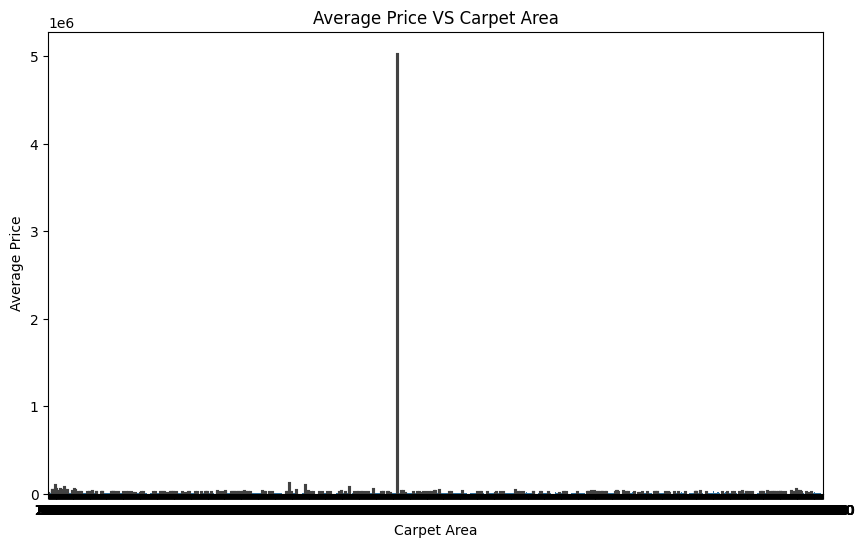

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Carpet Area', y='Price (in rupees)', estimator='mean')

plt.title('Average Price VS Carpet Area')
plt.xlabel('Carpet Area')
plt.ylabel('Average Price')
plt.show()

**Task:** Visualize relationship between Carpet Area and Price.

**Reflection:** Do bigger flats always cost more? Are there any outliers?

### Average Price by Status

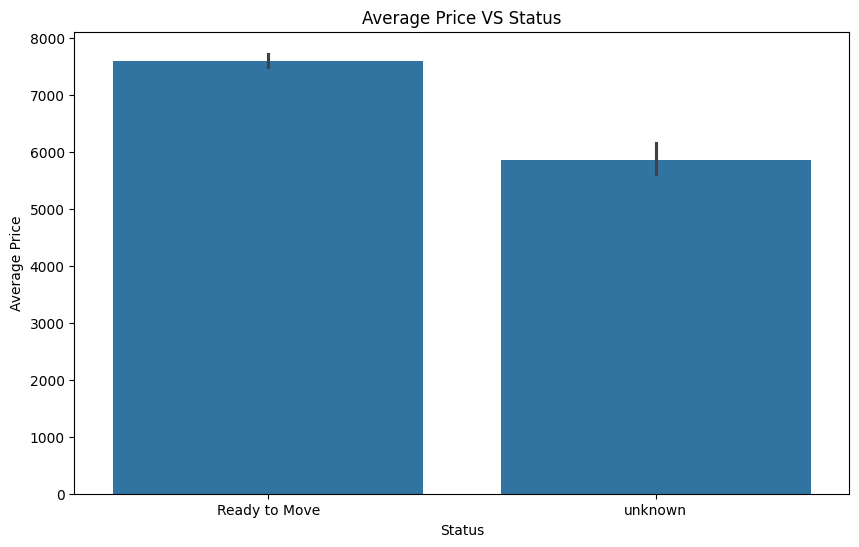

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Status', y='Price (in rupees)', estimator='mean')

plt.title('Average Price VS Status')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.show()

**Task:** Compare average prices by Status.

**Reflection:** Which type of Status is most expensive? Least expensive? Any surprises?

ready to move is most expensive

### Flats Count per Location

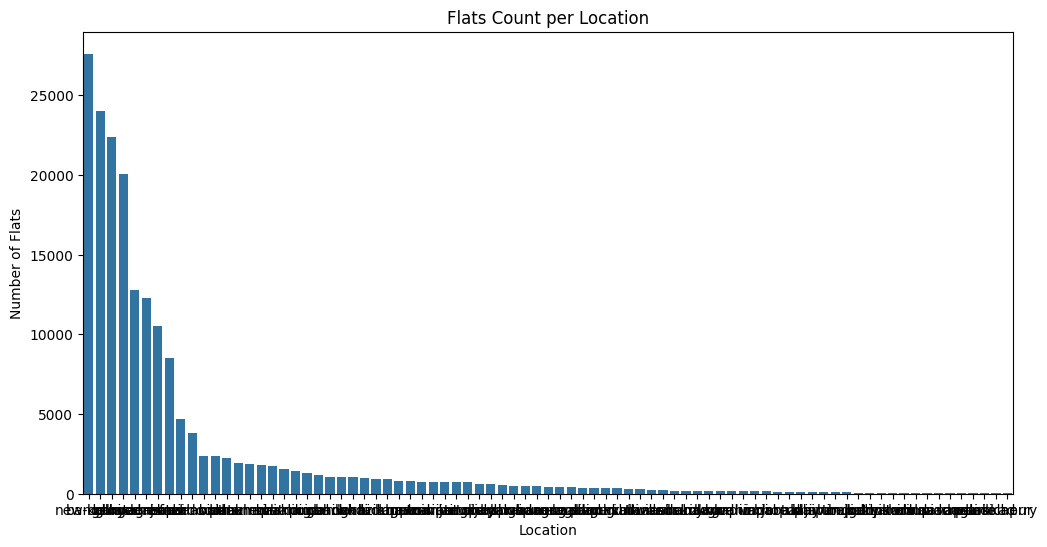

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='location', order=df['location'].value_counts().index)
plt.title('Flats Count per Location')
plt.xlabel('Location')
plt.ylabel('Number of Flats')
plt.show()

**Task:** See distribution of flats across locations.

**Reflection:** Which locations have the most flats? The least? Why might that be?

### Top Expensive Flats

        location  Price (in rupees)
181234  vadodara          6700000.0
147912      agra          4500000.0
180679   udaipur          4500000.0
176536  siliguri          4041600.0
174894    raipur          3450000.0


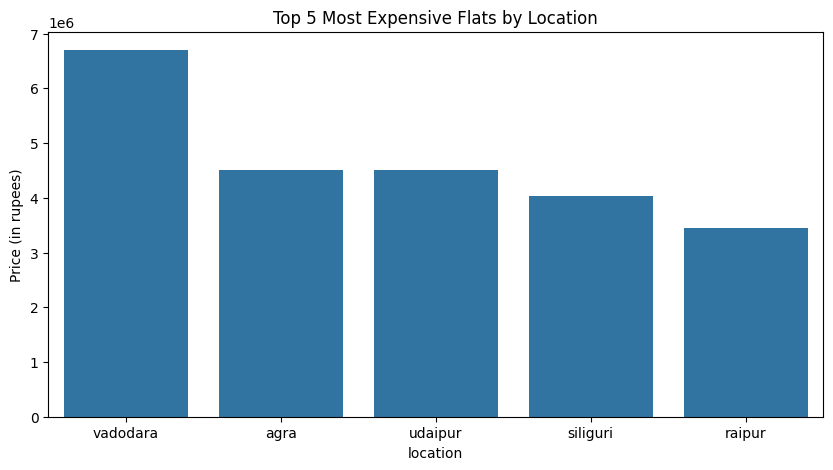

In [34]:
# Identify the top 5 most expensive flats in the dataset.
top_5_expensive = df.nlargest(5, 'Price (in rupees)')
# Display their prices and locations.
print(top_5_expensive[['location', 'Price (in rupees)']])
# Create a visualization that helps compare these flats clearly.
plt.figure(figsize=(10, 5))
sns.barplot(data=top_5_expensive, x='location', y='Price (in rupees)')

plt.title('Top 5 Most Expensive Flats by Location')
plt.show()



***Hint:** Think about which chart type best shows comparison between prices.*

### Large Flats Analysis

In [ ]:
# Filter flats with Carpet Area greater than 700 sqft.


# Analyze how these flats are distributed in terms of price or location.


# Visualize your findings using an appropriate chart.


***Hint:** Consider whether you want to show distribution, comparison, or trends.*

### Mean vs Median Price

In [ ]:
# Calculate the mean price and median price of flats.
mean_price = df['Price (in rupees)'].mean()
median_price = df['Price (in rupees)'].median()

print(f"Mean Price: {mean_price:,.2f}")
print(f"Median Price: {median_price:,.2f}")
# Visualize the comparison in a clear and simple way.
plt.figure(figsize=(8, 6))
labels = ['Mean', 'Median']
values = [mean_price, median_price]
plt.bar(labels, values, color=['blue', 'orange'])
plt.title(' Mean vs Median Price')
plt.ylabel('Price')

plt.show()


**Reflection:** What does the difference between mean and median tell you about the data?

### Floor vs Price Relationship

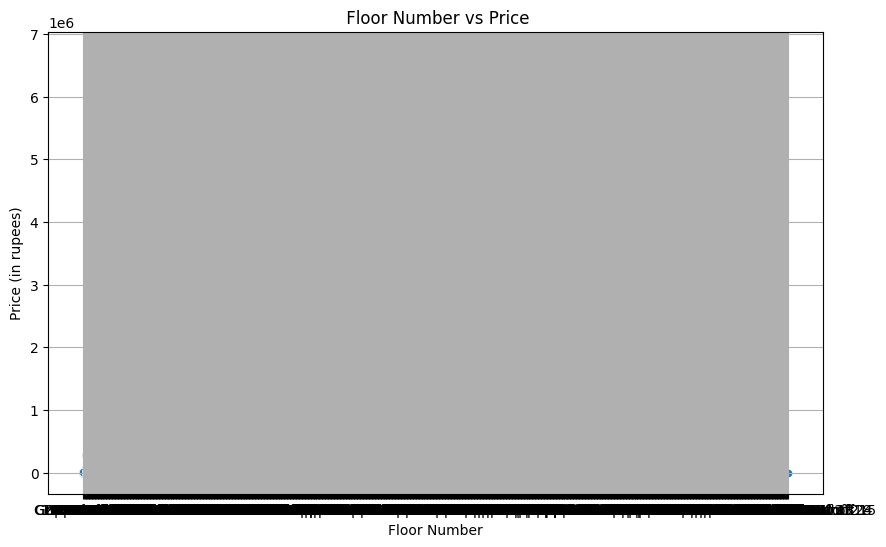

In [36]:
# Explore the relationship between Floor number and Price.

# Create a visualization to represent this relationship.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Floor', y='Price (in rupees)')

plt.title(' Floor Number vs Price')
plt.xlabel('Floor Number')
plt.ylabel('Price (in rupees)')
plt.grid(True)
plt.show()

**Task :** Describe any patterns or trends you observe.

***Hint:** Think about which plots are best for showing relationships between two numeric variables.*

### Average Carpet Area by Location

In [42]:
# Calculate the average Carpet Area for each location.
 df.groupby('location')['Carpet Area'].mean()

# Visualize the results to compare locations.
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='location', y='Carpet Area', estimator='mean')

plt.title('Average Carpet Area by Location')
plt.xlabel('Location')
plt.ylabel('Average Carpet Area')
plt.show()

IndentationError: unexpected indent (3908193498.py, line 2)

***Note :** Focus on clarity and readability of your chart.*

**Reflection:** Which locations tend to have larger flats on average?

## Summary & Insights

For each task above, write a short summary including:

- What you did

- Which visualization you chose and why

- One or two insights you discovered from the data

### **Final Note** 

This dataset is part of a Mini Data Analysis Project.

You are encouraged to:

- Add your own questions based on the data

- Create additional visualizations

- Explore relationships that you personally find interesting

***⚠️ Bonus:** Adding meaningful questions and visualizations will be considered in your task evaluation.*